# 3.4 주식비교하기

야후 파이낸스, 구글 파이내스를 위한 팬더스 기반 API가 제공했지만 2017 중단 이후 2019/8월 이후 야후 파이낸스만 복구 되었다.

야후파이낸스 finance.yahoo.com 은 미국 주식은 정확하지만, 국내 주식의 경우 누락, 값이 틀린 경우가 있다. 

## 3.4.1 야후 파이낸스로 주식 시세 구하기

```
pip install yfinance
pip install pandas-datareader
```

In [39]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

시세 조회

```
yf.get_data_yahoo(종목 [,start='', end=''])
```

코스피 종목은 6자리 종목코드 뒤에 .KS 를 붙이고 코스닥은 .KQ를 붙인다.

In [2]:
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
sec.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,46620.246094,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,47249.031250,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,45721.976562,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,46350.753906,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,46081.277344,10314997
2018-05-14,51000.0,51100.0,49900.0,50100.0,45003.351562,14909272
2018-05-15,50200.0,50400.0,49100.0,49200.0,44194.917969,18709146
2018-05-16,49200.0,50200.0,49150.0,49850.0,44778.789062,15918683
2018-05-17,50300.0,50500.0,49400.0,49400.0,44374.562500,10365440


OHLC와 함께 거래량, 수정종가가 포함되 있다. 
> 국내 주식에 액면 분할 처리가 제대로 안된 경우도 있다.

MS주식의 끝부분을 출력해보면 종가와 수정종가가 일치하는 것을 볼 수 있다.

In [7]:
msft.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,282.119995,289.980011,281.290009,289.100006,289.100006,30086300
2021-10-04,287.399994,287.750000,280.250000,283.109985,283.109985,31350700
2021-10-05,284.049988,290.399994,284.049988,288.760010,288.760010,24993000
2021-10-06,285.779999,293.630005,285.510010,293.109985,293.109985,28002600
2021-10-07,295.179993,296.640015,293.920013,294.850006,294.850006,20430500
2021-10-08,296.220001,296.640015,293.760010,294.850006,294.850006,17680300
2021-10-11,292.920013,297.970001,292.750000,294.230011,294.230011,19298600
2021-10-12,295.339996,295.440002,292.350006,292.880005,292.880005,17974100
2021-10-13,294.910004,297.279999,293.489990,296.309998,296.309998,23416300


날짜별 종가 그래프를 그려보자, 

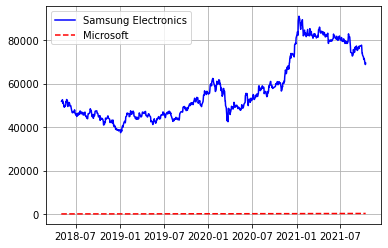

In [11]:
import matplotlib.pyplot as plt
plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.grid(True)
plt.legend(loc='best')
plt.show()

이렇게 주식별 가격으로 비교는 가격대가 다르면 비교가 어렵다. 그래서 일간 변동률을 이용해 주식을 비교하는 방법을 알아 보자


### 3.4.2 일간 변동률로 주가 비교하기

일간변동률 Daily Percent Change 를 구하면 가격이 다른 두 주가의 수익률을 비교할 수 있다. 일간변동률은
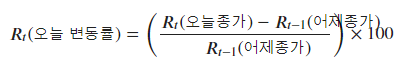

series.shift()를 이용하면 레코드의 앞/뒤로 이동이 간단하다.

In [22]:
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04', end='2019-12-31')
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100 # 일간 변동률 
sec_dpc.iloc[0] = 0 # 일간 변동률의 첫 번째 값인 NaN을 0으로 변경한다.

msft = pdr.get_data_yahoo('MSFT', start='2018-05-04', end='2019-12-31')
msft_dpc = (msft['Close'] / msft['Close'].shift(1) -1) * 100 # 일간 변동률 
msft_dpc.iloc[0] = 0

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
sec_dpc_cp = ((100+sec_dpc)/100).cumprod()*100-100 # 일간 변동률 누적곱 계산
msft_dpc_cp = ((100+msft_dpc)/100).cumprod()*100-100  # 일간 변동률 누적곱 계산

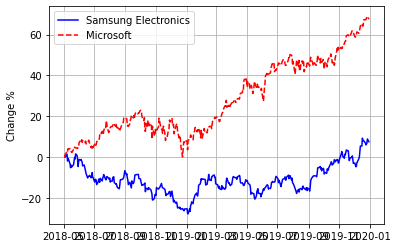

In [24]:
import matplotlib.pyplot as plt

plt.plot(sec.index, sec_dpc_cp, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cp, 'r--', label='Microsoft')
plt.ylabel('Change %') 
plt.grid(True)
plt.legend(loc='best')
plt.show()

### 3.4.3 주간 일간 변동률 히스토그램

삼성전자의 일간 변동률을 18개 구간으로 그려보자

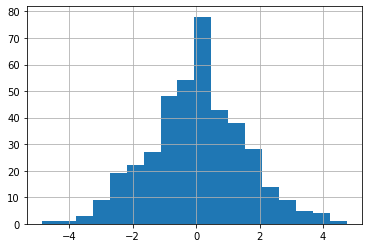

In [25]:
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100 # 일간 변동률 
sec_dpc.iloc[0] = 0
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

주가 수익률은 정규분포보다 중앙 부가 더 뽀족하고 분포의 양쪽 꼬리는 더 두터운 것으로 알려져 있다. 이를 각각 급첨 분포 Lepotojutic distribution 와 팻 테이 fat tail이라 부른다.

표준편차를 확인해 봐자

In [18]:
sec_dpc.describe()

count    845.000000
mean       0.048434
std        1.680598
min       -6.387665
25%       -0.976562
50%        0.000000
75%        0.988468
max       10.470588
Name: Close, dtype: float64

### 3.4.4. 일간 변동률 누적합 구하기

종목별 변동률을 비교하려면 일간변동률의 누적합을 계산해서 전체적인 변동률을 계산해야 한다. 

In [26]:
sec_dpc_cs = sec_dpc.cumsum() # 누적합
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2019-12-23    11.262524
2019-12-24    10.361623
2019-12-26    11.088896
2019-12-27    13.074456
2019-12-30    11.835518
Name: Close, Length: 404, dtype: float64

In [27]:
msft_dpc_cs  = msft_dpc.cumsum()
msft_dpc_cs

Date
2018-05-03     0.000000
2018-05-04     1.158716
2018-05-07     2.272627
2018-05-08     1.846516
2018-05-09     3.025939
                ...    
2019-12-23    55.887491
2019-12-24    55.868433
2019-12-26    56.688101
2019-12-27    56.870876
2019-12-30    56.009017
Name: Close, Length: 418, dtype: float64

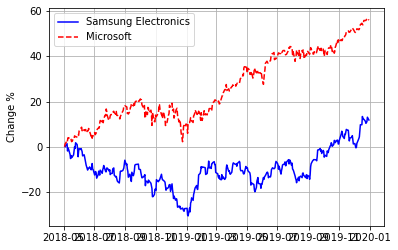

In [28]:
import matplotlib.pyplot as plt

plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.ylabel('Change %') 
plt.grid(True)
plt.legend(loc='best')
plt.show()

액면분할을 실시한 2018/5/4일 이후 삼성전자를 투자했으면 손실을 볼 수 있고, MS는 40% 이상 수익이 기대된다.

# 3.5 최대 손실 낙폭

***최대손실낙폭 MDD Maximum Drawdown*** 은 특정 기간에 발생한 최고점에서 최저점가지 가장 큰 손실을 의미한다. 특정 기간 동안 얼마의 손실이 날 수 있는지 나타낸다.

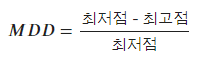

### 3.5.1 KOSPI의 MDD

코스피는 1983년 부터 발표되었고, 1980년 1월 4일에 상장된 모든 종목의 시가 초액을 기준 지수 100포인트로 집계한다. 코스피지수 2500은 한국 증시가 당시보다 25배 올랐음을 의미한다.


### 3.5.2 서브프라임 당시의 MDD

2004년 부터 코스피 지수를 받아 MDD를 구해보자. 이를 위해서 `rolling()` 함수를 사용한다. rolling은 윈도우 크기 개수의 데이터를 추출해 집계 함수에 해당하는 연산을 수행한다.

```python
Series.rolling(window [, min_periods=1])[집계함수]
 - window: 데이터 개수.
 - 집계함수: min, max, mean() 등
 - min_periods: 데이터 개수가 윈도우 크기에 미치지 못해도 min_periods 지정 개수 만족하면 연산을 수행.
```

In [29]:
kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')
kospi.shape

[*********************100%***********************]  1 of 1 completed


(4388, 6)

In [31]:
window = 252 # 1년 개장일
peak = kospi['Adj Close'].rolling(window, min_periods=1).max() #1년간 최고치

In [32]:
drawdown = kospi['Adj Close']/peak - 1.0  # 최고치 대비 현재 종가가 얼마나 하락했나?
max_dd = drawdown.rolling(window, min_periods=1).min() # drawdown 에서 최저치

max_dd가 바로 최대 손실 낙폭이 된다. 서브프라인 위기 당시인 2008년 10월 24일 코스피 지수가 10.57% 하락하며 MDD가 -54.5%를 기록했다. 

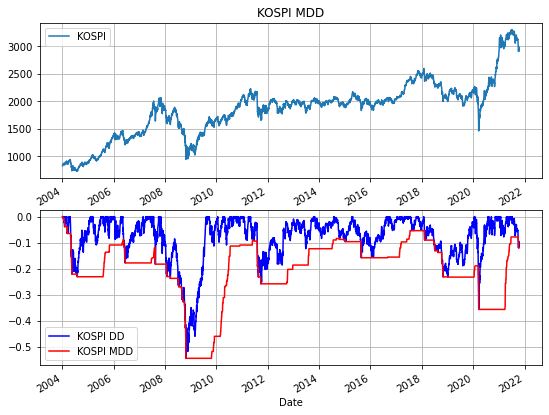

In [33]:
plt.figure(figsize=(9, 7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()



정확한 MDD값은 min()으로 구한다.

In [34]:
max_dd.min()

-0.5453665130144085

MDD를 기록한 구간은 

In [36]:
max_dd[max_dd==-0.5453665130144085]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

# 3.6 회귀분석과 상관관계



## 3.6.1 KOSPI와 다우지수 비교

국내주식과 미국 주식의 상관관계를 구해보자, 야후파이낸스에서 2000/1/4 부터 두 지수를 구해보자


In [37]:
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


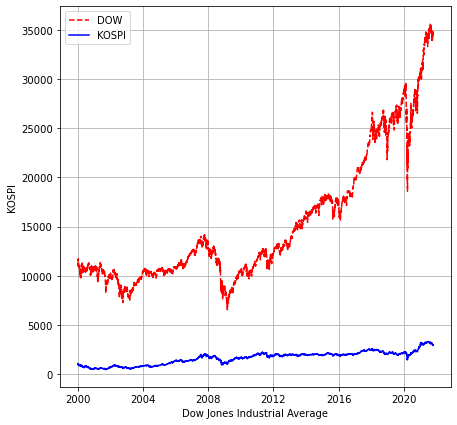

In [41]:
plt.figure(figsize=(7, 7))
plt.plot(dow.index, dow.Close, 'r--', label='DOW')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 3.6.2 지수화 비교

일별 종가만으로 상관관계를 파악하기 어렵다ㅣ . 현재 종가를 특정 시점의 종가로 나누어 변동률을 구해보자.

현재 종가를 특정 일자 종가로 나눈뒨 100을 곱하면 특정 일자 종가 대비 오늘의 변동율을 구하게 된다.

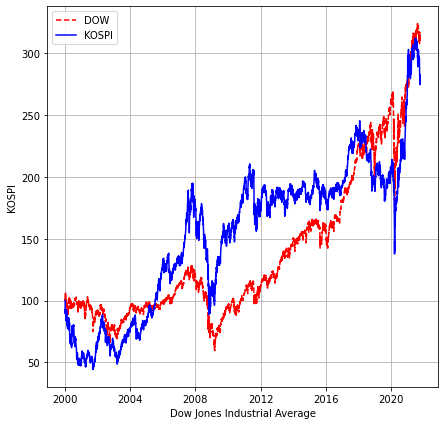

In [43]:
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100 # 지수화
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100 # 지수화

plt.figure(figsize=(7, 7))
plt.plot(d.index, d, 'r--', label='DOW')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 3.6.3 산점도 분석



In [44]:
dow.shape[0], kospi.shape[0]

(5482, 5367)

종가 칼럼으로 데이터 프레임으로 생성하면 한족 데이터가 없으면 NaN으로 채워져서 데이터 개수가 늘어난다.

In [45]:
df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df.shape

(5647, 2)

NaN을 포함하고 있으므로 이를 fillna()로 채운다
 - bfill: backward fill.
 - ffill : forward fill
 

In [46]:
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

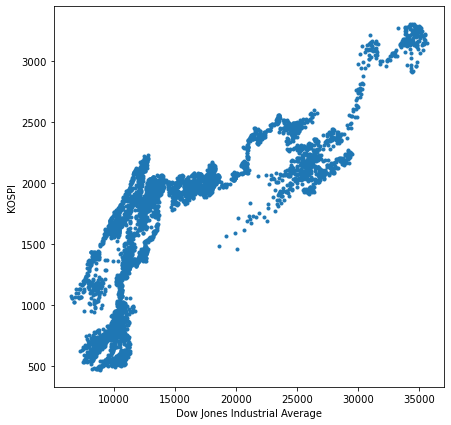

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

# 3.7 상관계수에 따른 리스크 완화

상관계수 Coefficient of Correlation 은 독립변수와 종속변수 사이의 상관관계 정도를 수치로 나타내 준다. 상관계수 r은 $-1 \le r \le 1$ 을 만족한다. 
 - 양의 상관관계로 강한 값을 1, 음의 상관관계 강한 값을 -1, 상관이 없으면 0

A자산과 B자산의 상관계수가 1이면 A자산 가치가 x% 만큼 상승할 때 B자산 가치도 x% 만큼 상승한다. A자산과 B자산 상관계수가 -1이면 A 자산 가치가 x% 만큼 상승할 때 B자산의 가치는 x% 만큼 하락한다. 0이라면 두 자산의 움직임에 관계가 없다는 의미다.

## 3.7.1 데이터프레임 상관계수 구하기

데이터프레임의 corr() 함수를 사용한다.

In [49]:
df.head()

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024


In [50]:
# 데이터프레임으로 상관계수
df.corr()

,DOW,KOSPI
DOW,1.000000,0.811276
KOSPI,0.811276,1.000000


In [51]:
# 시리즈로 상관계수
df['DOW'].corr(df['KOSPI'])

0.8112755594080421

## 3.7.3 결정계수 구하기

결정계수 R-squared 는 관측된 데이터에서 추정한 회귀선이 실제 데이터를 어느 정도 설명하는지 나타내는 계수로 두 변수의 상관정도를 나타내는 상관계수를 제곱한 값이다.

In [53]:
# 시리즈로 상관계수
r_value = df['DOW'].corr(df['KOSPI'])
r_value

0.8112755594080421

In [54]:
r_squared = r_value ** 2  # 제곱
r_squared

0.6581680332928316

결정계수가 1이면 모든 표본 관측치가 회귀선상에 있다는 의미로 추정한 회귀선이 두 변수 사이 관계를 완벽히 설명한다고 한다. 반면 결정계수가 0 이면 추정한 회귀선이 변수 사이를 설명하지 못한다는 것이다.

## 3.7.4 다우존스와 코스피 회귀 분석

두 지수를 선형회귀 모델을 생성해 회귀선을 그려서 분석해 보자.

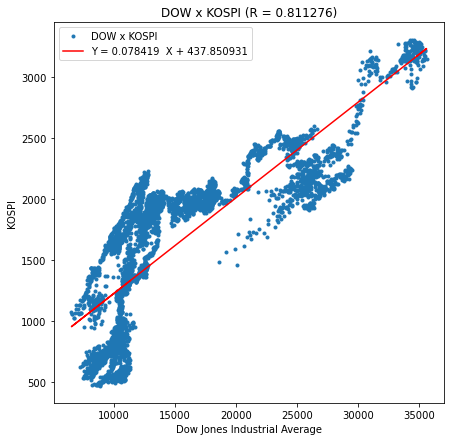

In [55]:
df = pd.DataFrame({'X':dow['Close'], 'Y':kospi['Close']})
# NaN 해소
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
# 회귀모델
regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.') 
# 회귀선
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()


2000-1-4일 부터 2021-10-14일까지 코스피 지수와 다우존스

In [58]:
kospi.index.min(), kospi.index.max()

(Timestamp('2000-01-04 00:00:00'), Timestamp('2021-10-14 00:00:00'))

의 상관계수는  0.8 이다. 두 자산에 분산투자를 할 경우 약간의 리스크 완화 효과를 기대할 수 있다.

In [60]:
df.corr()

,X,Y
X,1.000000,0.811276
Y,0.811276,1.000000


In [64]:
df.corr().iloc[0].iloc[1]

0.8112755594080431

회귀식은 $ y = 0.07 \cdot x + 437.85$ 이다. 따라서 임의의 다우존스 지수 값이 주어질 때 대략적인 KOSPI 지수를 예측해 볼 수 있다.

이번에는 코스피와 미국 국채의 상관도로 살펴보자. 미국 국채 iShares 20+ Year Tresury bond ETF (TLT) 데이틀 받고 조회한다. 시작일을 2002년 7월 30일로 해서 조회한다.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


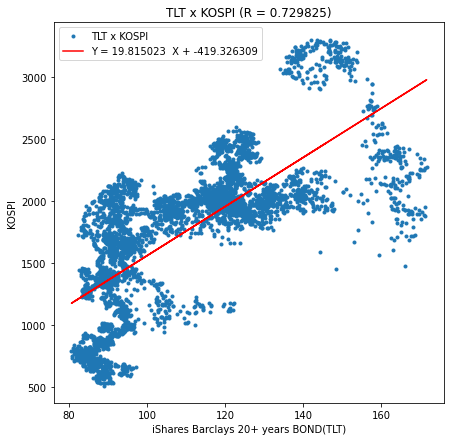

In [65]:
tlt = pdr.get_data_yahoo('TLT', '2002-07-30')   
kospi = pdr.get_data_yahoo('^KS11', '2002-07-30')

df = pd.DataFrame({'X':tlt['Close'], 'Y':kospi['Close']})
# NaN 해소
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
# 회귀모델
regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.') 
# 회귀선
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['TLT x KOSPI', regr_line])
plt.title(f'TLT x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('iShares Barclays 20+ years BOND(TLT)')
plt.ylabel('KOSPI')
plt.show()


In [66]:
df['X'].corr(df['Y'])

0.7298252093083902

미국 20년 국채와 코스피의 상관계수는 0.72다. 다우지수와 코스피가 0.8에 비해 낮으므로 국내 주식을 가진경우 다우존스 보다 국채에 투자하는 것이 분산 투자에 리스크 완화에 도움이 된다는 의미이다.